# LOAN PREDICTION USING PYTHON


## Loading Packages:


In [152]:
import pandas as pd
import numpy as np          # For Mathematical Caluculations
import seaborn as sns       # For data visualisation
import matplotlib.pyplot as plt      # For ploting Graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")     # To ignore any warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

## Reading Data

In [153]:
train=pd.read_csv(r"train.csv")

In [154]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [155]:
test=pd.read_csv(r"test.csv")

In [156]:
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


#### Lets make a copy of the train and test data so that even if we have to make any changes in these data sets we will not lose the original data sets.

In [157]:
train_original=train.copy()

In [158]:
test_original=test.copy()

## Understanding the data:

In [159]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### We have 12 independent variables and 1 target variables i.e Loan_Status.

In [160]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### We have similar features in the test data set as the train data sets except the target variable (Loan_status). 

In [161]:
train.dtypes  # print data types for each variable

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

##### There are 3 formats of data types: Object, int64 and float64.

In [162]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [163]:
train.shape   # shape of the data set

(614, 13)

In [164]:
test.shape

(367, 12)

# Univariate analysis

In [165]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [166]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

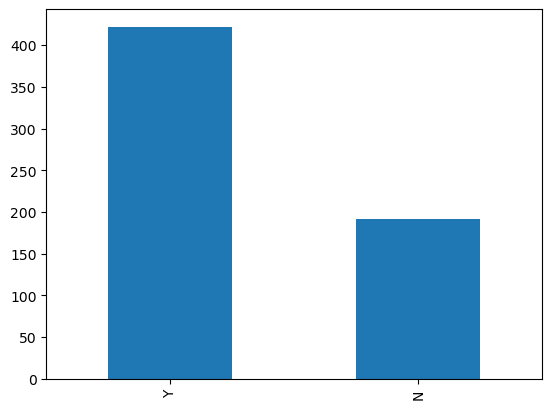

In [167]:
train['Loan_Status'].value_counts().plot.bar()


##### The loan of 422(around 69%) out of 614 people was approved.

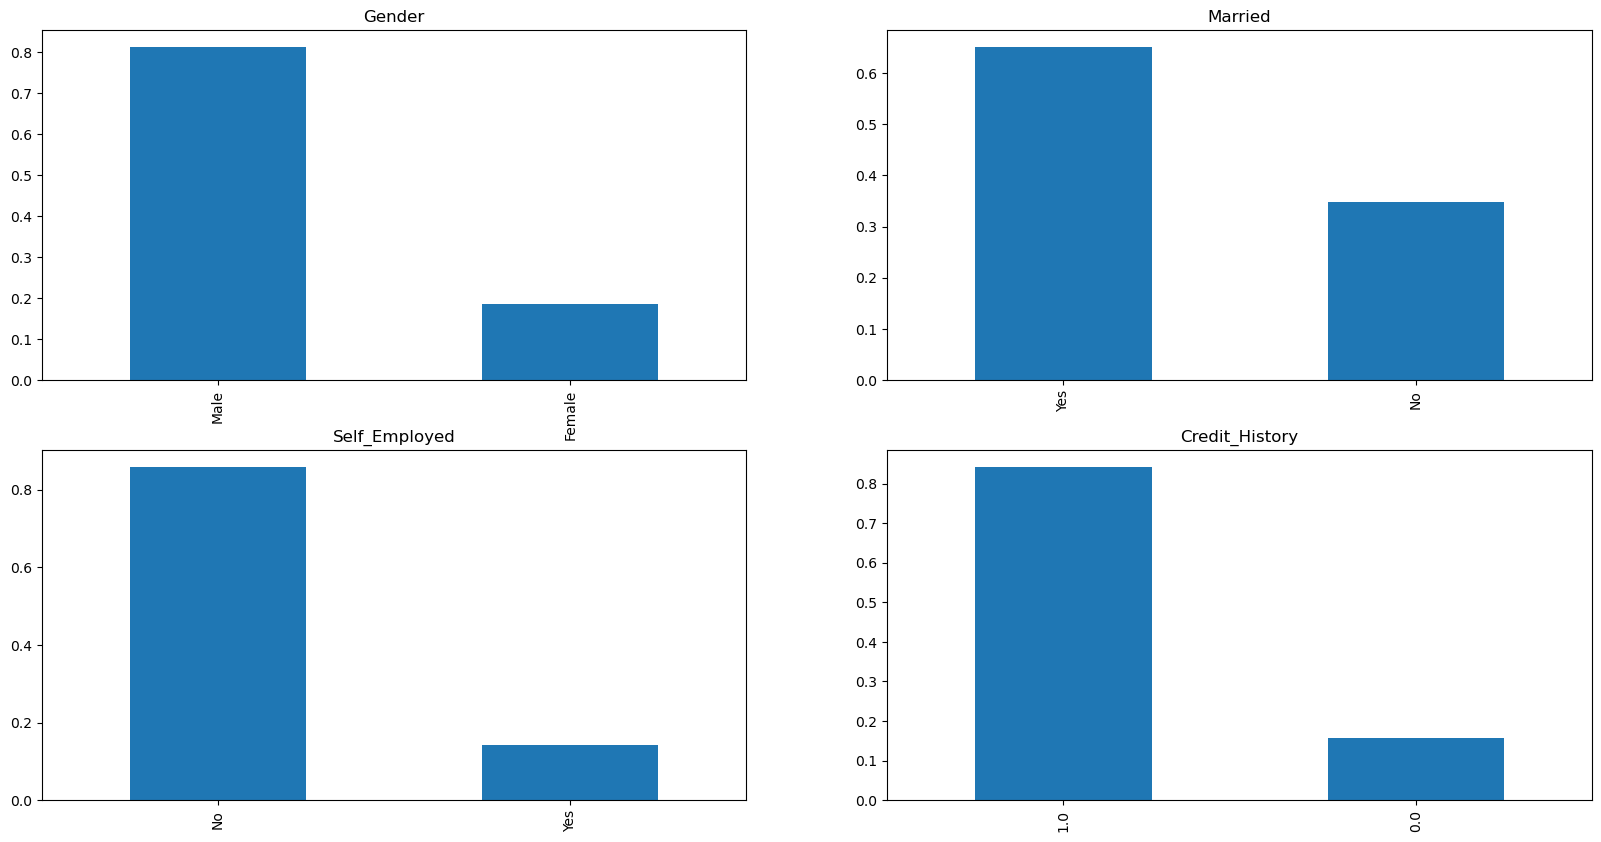

In [168]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Credit_History")
plt.show()

##### It can be inferred from the above bar plots that:

1. 80% applicants in the dataset are male.
2. Around 65% of the applicants in the dataset are married.
3. Around 15% of the applicants in the dataset are self employed.
4. Around 85% of the applicants has repayed their debts.


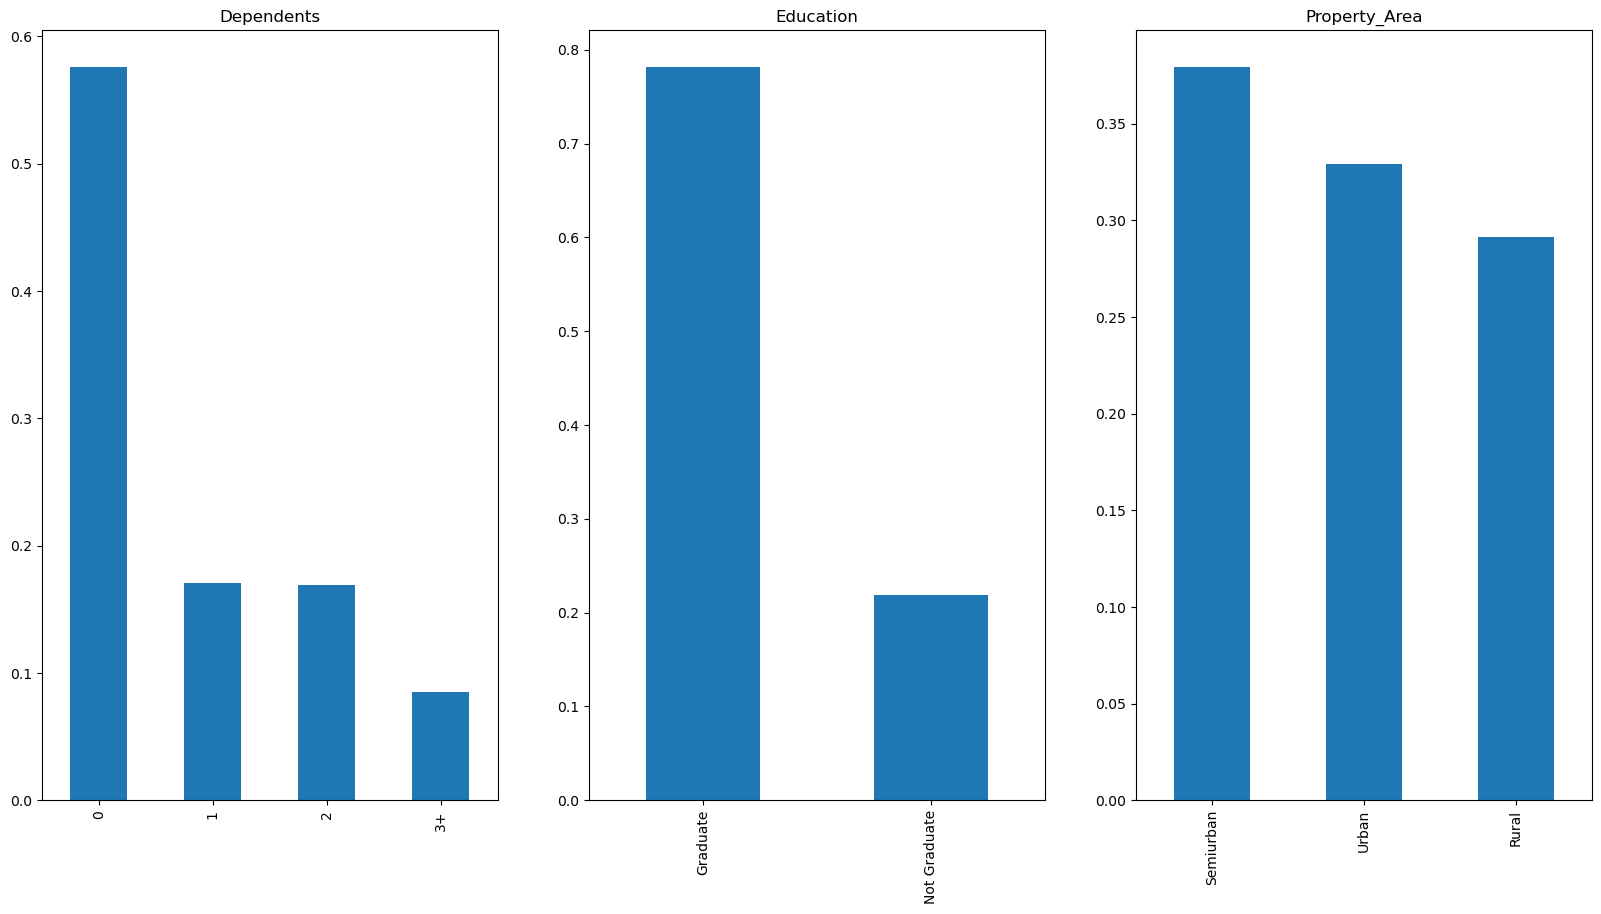

In [169]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Dependents")
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Education")
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,10),title="Property_Area")

plt.show()

##### Following inferences can be made from the above bar plot:
1. Most of the applicants don't have any dependents.
2. Around 80% of the applicants are graduate.
3. Most of the applicants are from semi urban area.

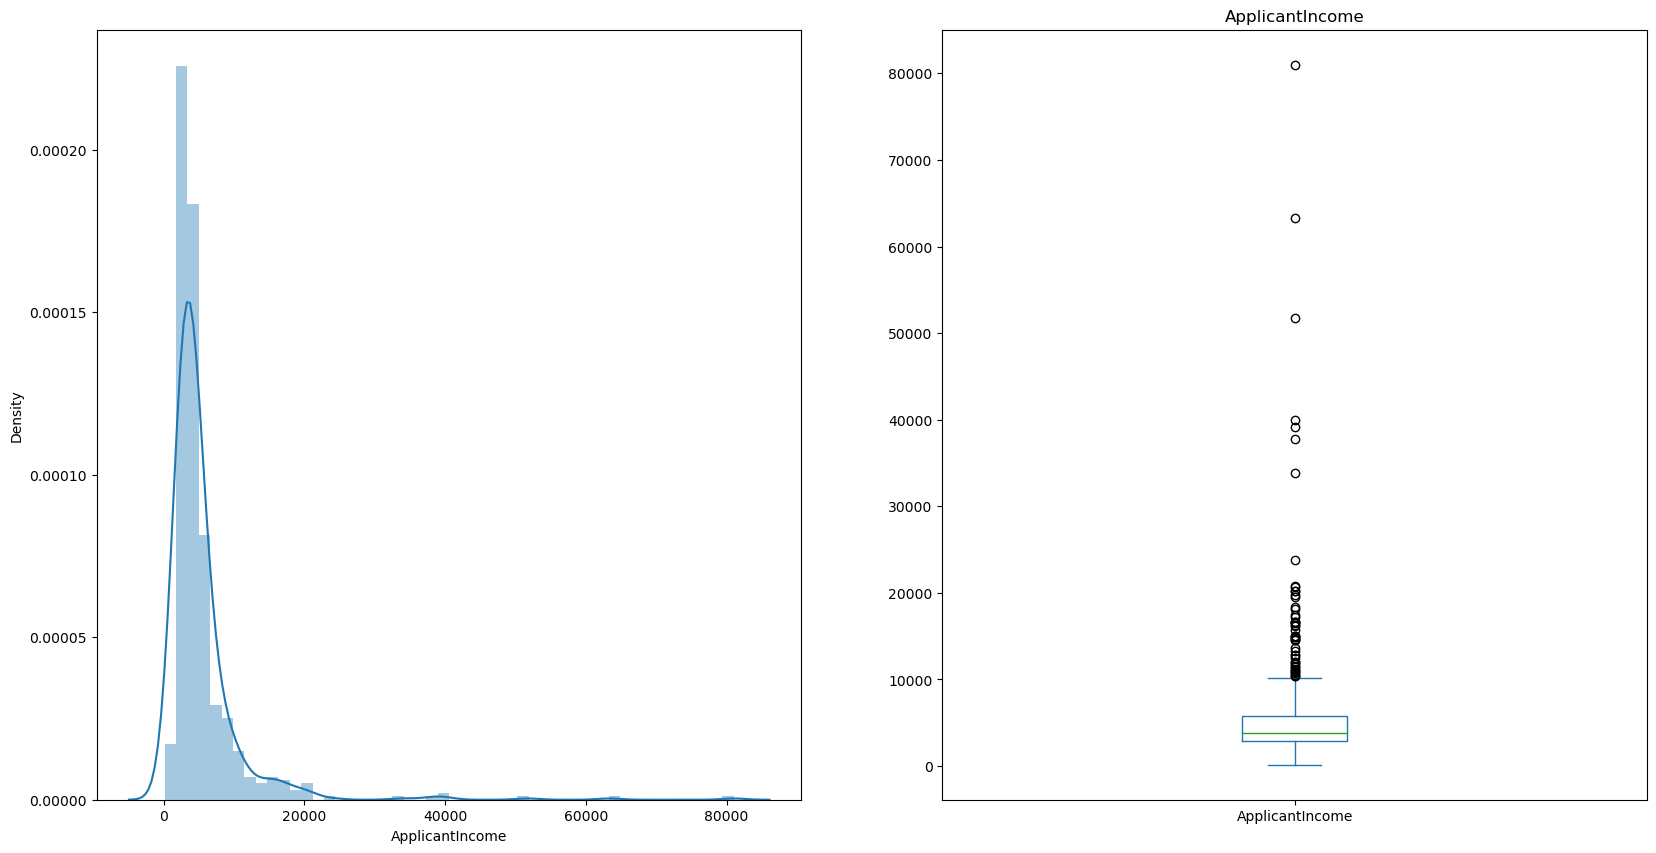

In [170]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(title='ApplicantIncome',figsize=(20,10))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is distributed towards the left which means it is not normally distributed.
The box plot confirms the presence of lot of outliers/extreme values. This can be attirbuted to the income disparity in the society.Part of this can be driven by the fact that we are looking at people with different education levels. Let us seggregate them by education:

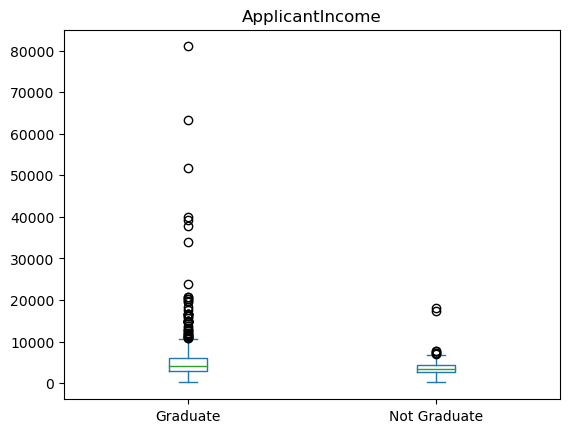

In [171]:
train.plot.box(column='ApplicantIncome',by='Education')
plt.show()

There are high number of graduates with very high inccome which appears to be the outliers.

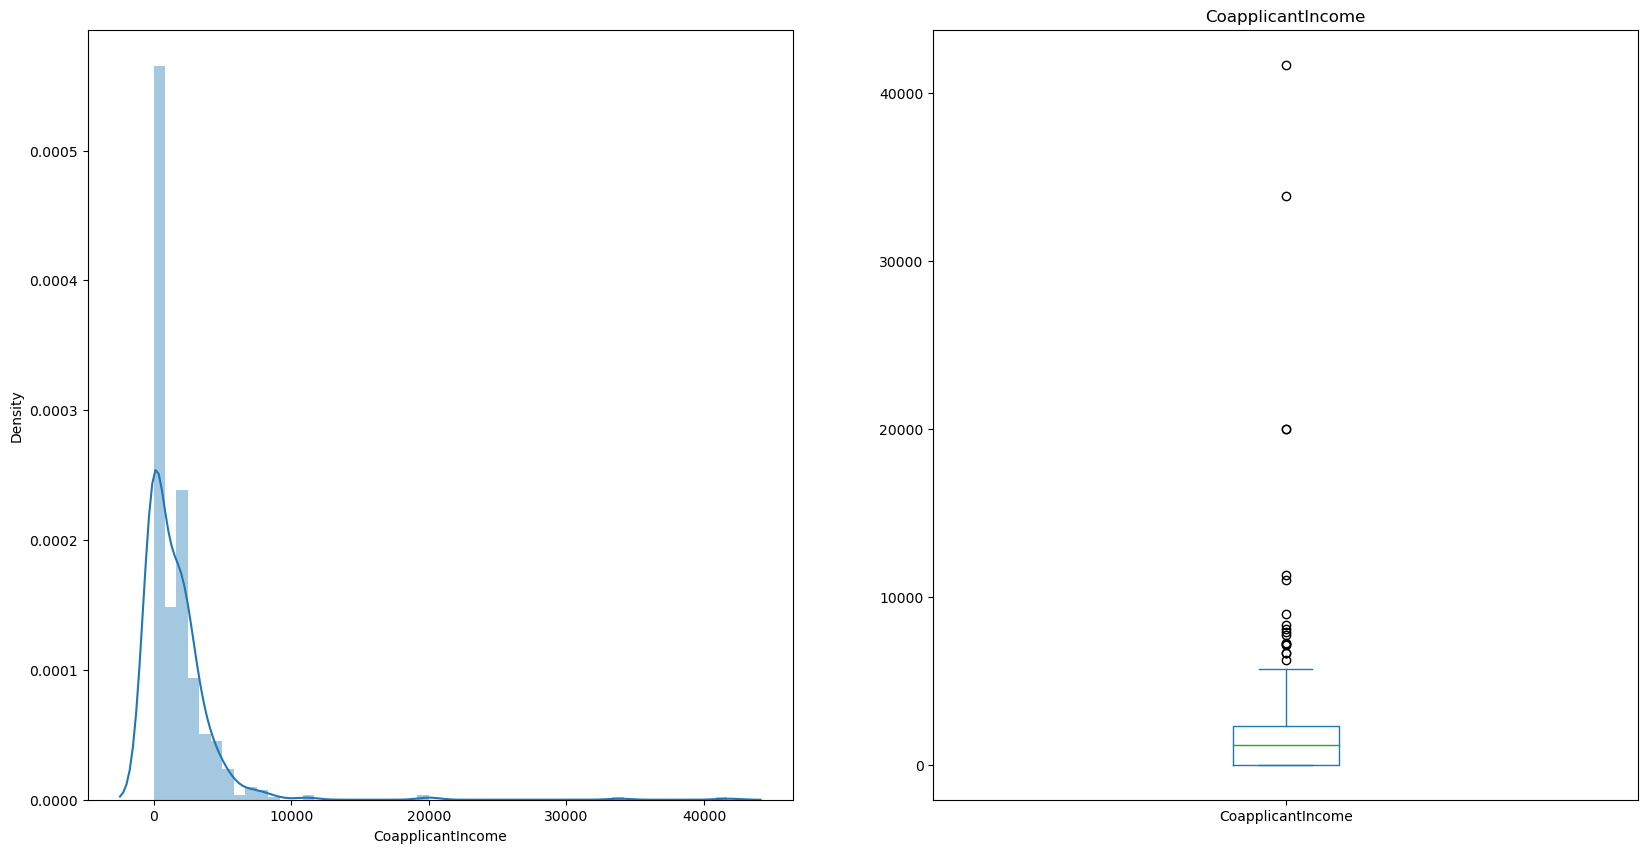

In [172]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(title='CoapplicantIncome',figsize=(20,10))
plt.show()

We see similar distribution as that of the applicants income.Majority of the income ranges from 0 to 5000. We also see lot of outliers in the coapplicants income and it is also not normally distributed.

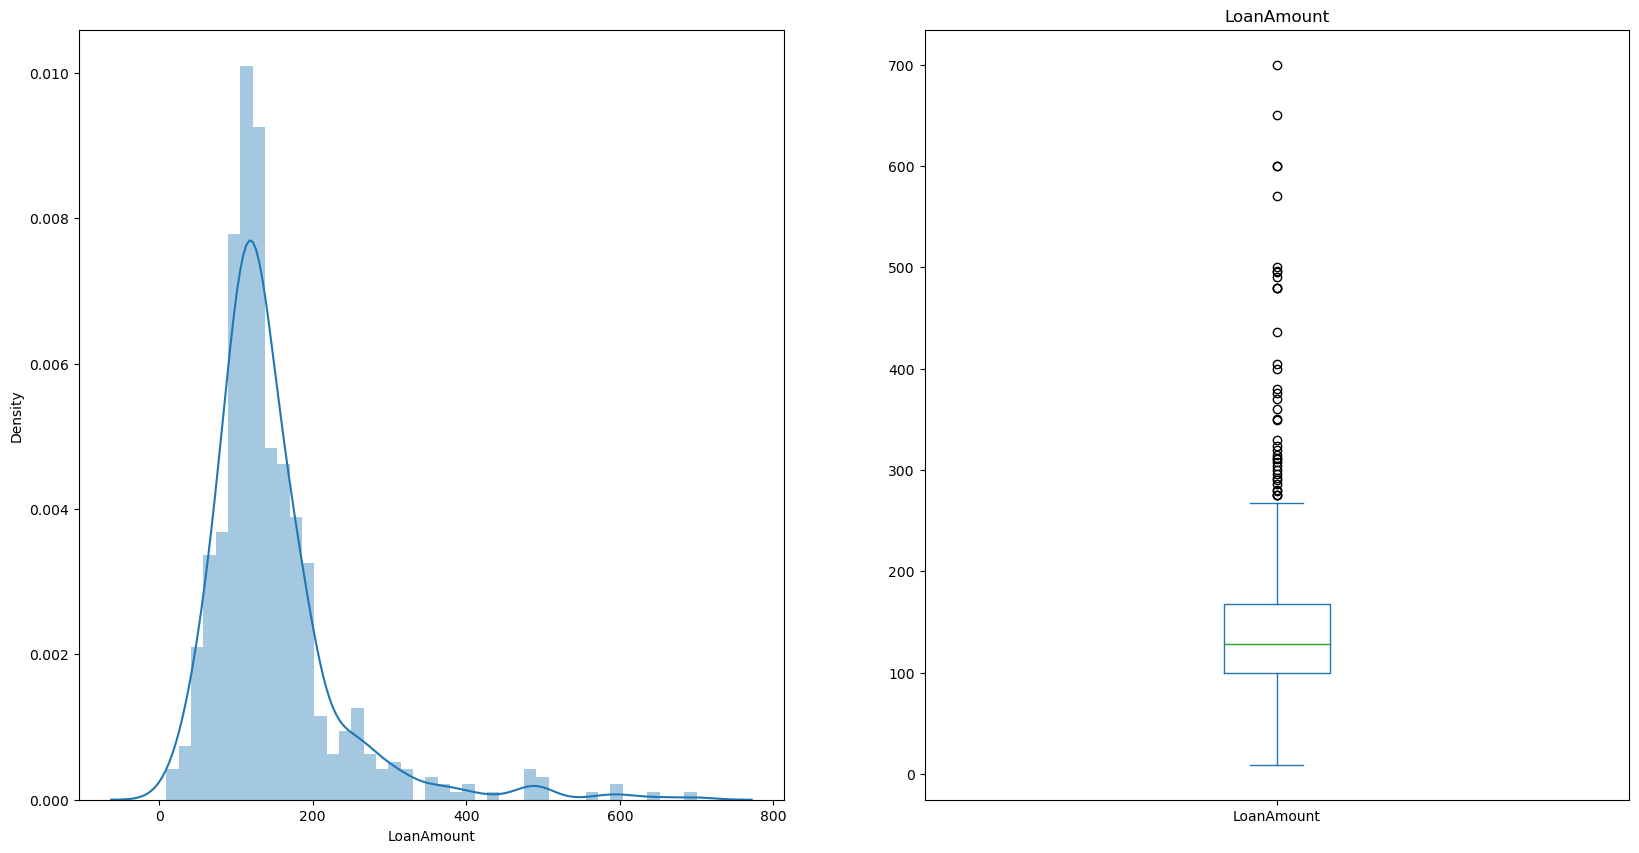

In [173]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(title='LoanAmount',figsize=(20,10))
plt.show()

We see lot of outliers in this variable and the distribution is fairly normal.

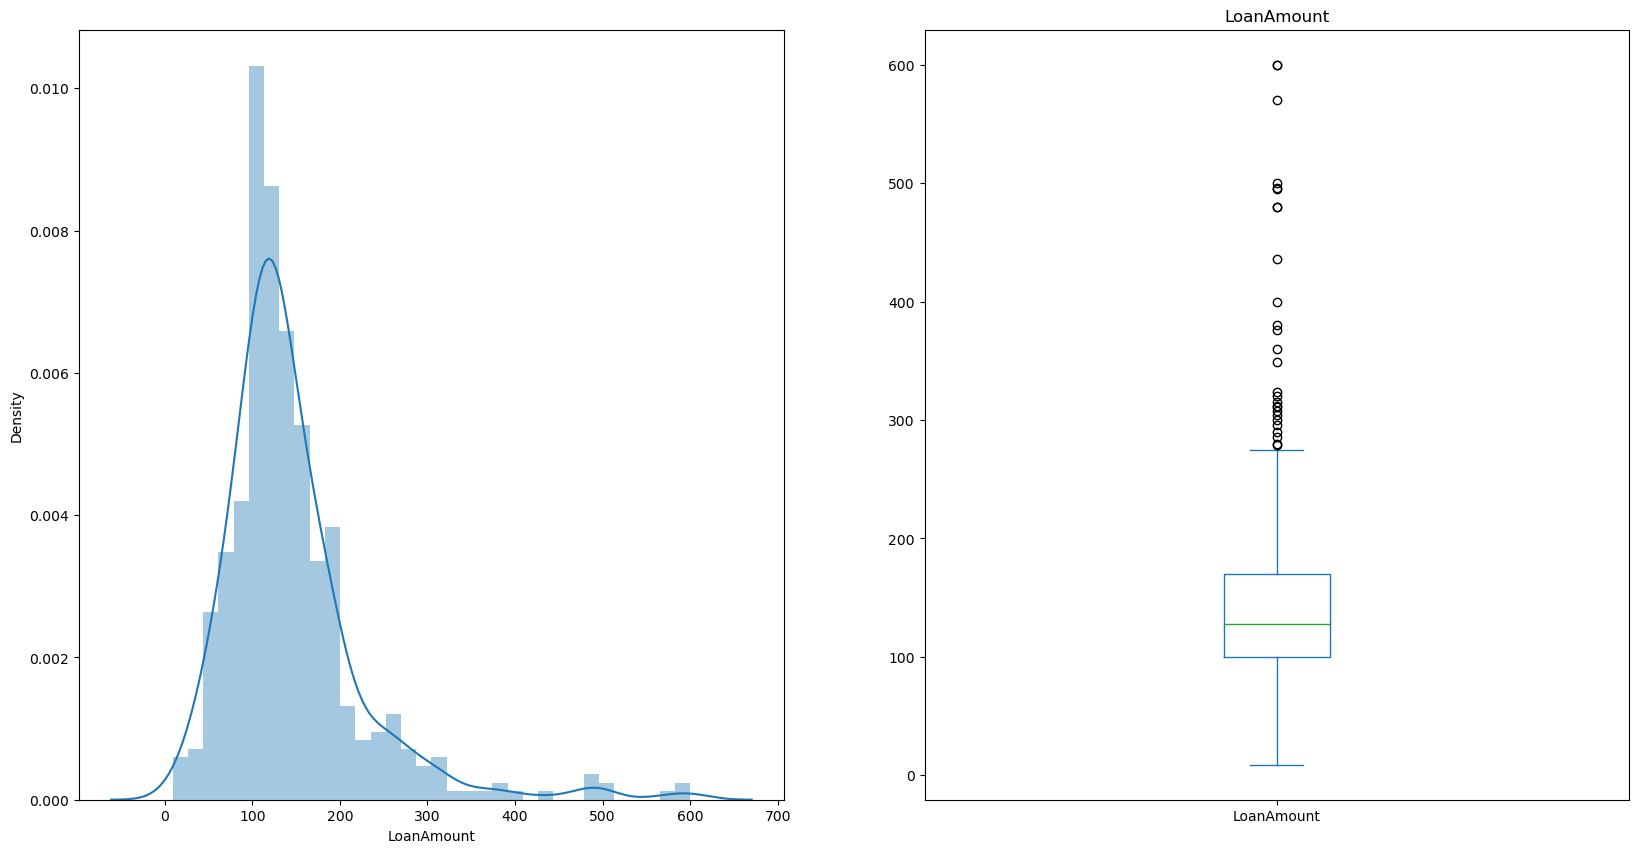

In [174]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(title='LoanAmount',figsize=(20,10))
plt.show()

# Bivariate Analysis

In [175]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])

In [176]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [177]:
sums=Gender.sum(1)

In [178]:
sums

Gender
Female    112
Male      489
dtype: int64

In [179]:
divs=Gender.div(sums.astype(float),axis=0)

In [180]:
divs

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


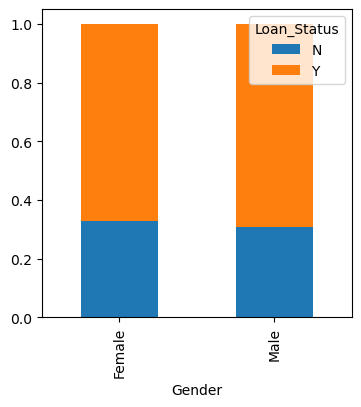

In [181]:
Gender.div(sums.astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

It can be inferred that proportion of male and female applicants is more or less same for approved and unapproved loans.

In [182]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

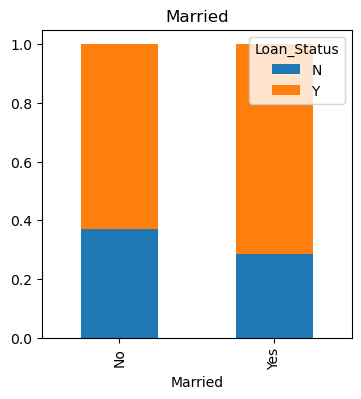

In [183]:

Married.div(Married.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title="Married")
plt.show()


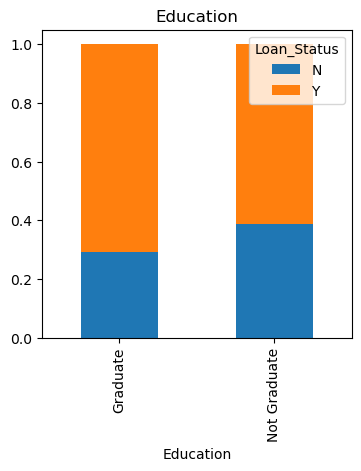

In [184]:
Education.div(Education.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title="Education")

plt.show()

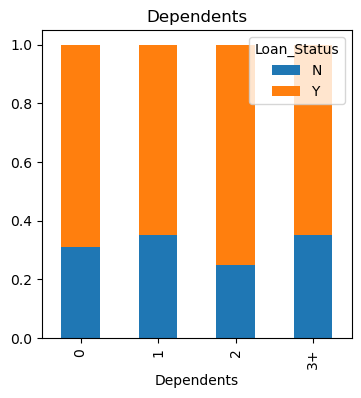

In [185]:
Dependents.div(Dependents.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title="Dependents")
plt.show()

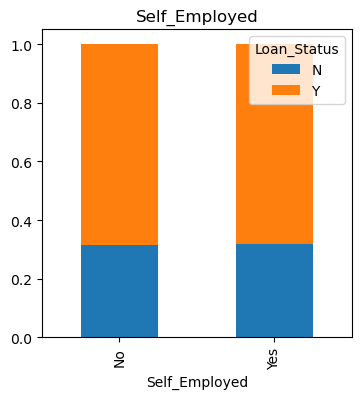

In [186]:
Self_Employed.div(Self_Employed.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title="Self_Employed")
plt.show()

In [187]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

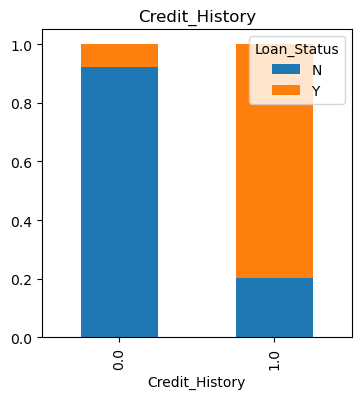

In [188]:
Credit_History.div(Credit_History.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title="Credit_History")
plt.show()

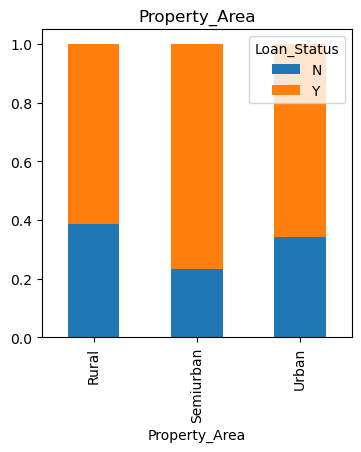

In [189]:
Property_Area.div(Property_Area.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title="Property_Area")
plt.show()

1. Proportion of married applicants is higher for the approved loans.
2. Distribution of applicants with 1 or 3+ dependents is similar across both the categories of the loan status.
3. There is nothing significant we can infer from self employed vs loan status plot.
4. It seems people with credit history as 1 are more likely to get their loans approved.
5. Proportion of loan getting approved in semi urban area is higher as compared to that in rural and urban areas.

<Axes: xlabel='Loan_Status'>

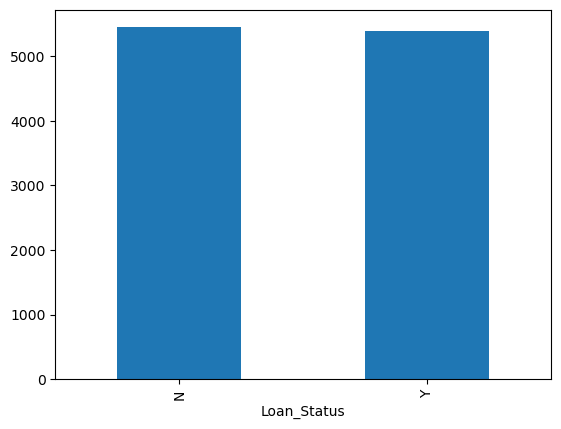

In [190]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We dont see any change in the mean income so we create bins for the applicants income variable based on the values in it and analyze the corresponding loan status for each bin.

In [191]:
bins=[1,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [192]:
Incomebin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

Text(0, 0.5, 'Percentage')

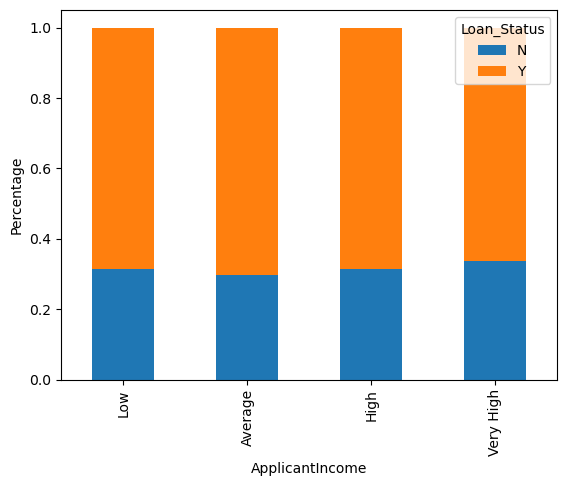

In [193]:
Incomebin.div(Incomebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

It can be inferred that applicants income does not affect the chances of loan approval which is in contradicts to our hypothesis in which we assume higher the applicants income higher the chances of loan approval.

In [194]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

Text(0, 0.5, 'Percentage')

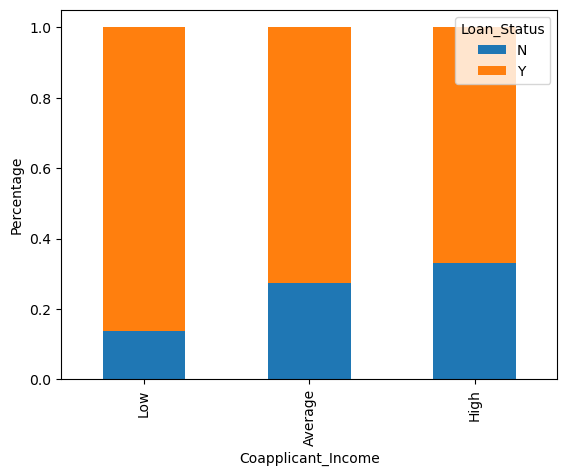

In [195]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Coapplicant_Income')
plt.ylabel('Percentage')

It shows that if the coapplicants income is less the chances of loan approval is high. But this does not look right. The possible reason behind this is most of the applicants do not have co applicants where the coapplicants income become 0 and hence the loan approval is not dependent on it. So we make a new variable in which we will combine the applicants and the co applicants income to visualize the combine effect of the income on loan approval.

In [196]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']


In [197]:
bins=[1,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['total_income_bin']=pd.cut(train['total_income'],bins,labels=group)


In [198]:
totalIncomebin=pd.crosstab(train['total_income_bin'],train['Loan_Status'])

In [199]:
totalIncomebin

Loan_Status,N,Y
total_income_bin,,
Low,14,10
Average,32,87
High,65,159
Very High,81,166


Text(0, 0.5, 'Percentage')

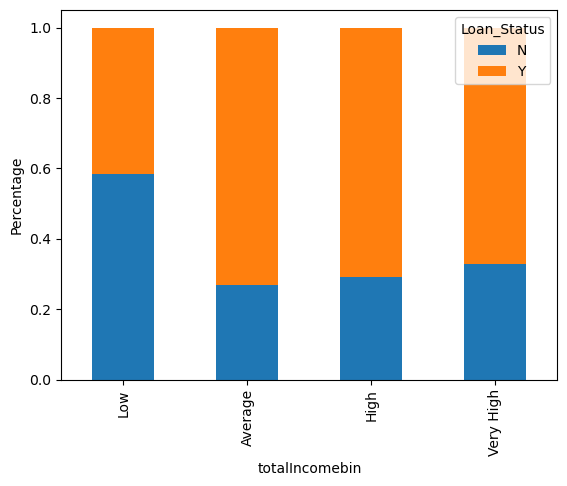

In [200]:
totalIncomebin.div(totalIncomebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('totalIncomebin')
plt.ylabel('Percentage')

We can see that the proportion of loan getting approved for applicants having low total income is very less as compared to that of applicants with average, high and very high income.

Text(0, 0.5, 'Percentage')

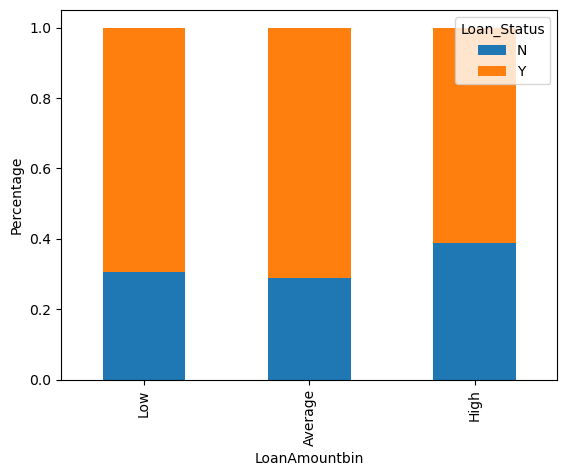

In [201]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmountbin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmountbin=pd.crosstab(train['LoanAmountbin'],train['Loan_Status'])
LoanAmountbin.div(LoanAmountbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmountbin')
plt.ylabel('Percentage')

We can see that proportion of approved loan is higher for low and average loan amount as compared to that of high loan amount which supports our hypothesis in which we considered the chances of loan approval will be high when the loan amount is less.

Dropping the bins created for the exploration part.

In [202]:
train=train.drop(['LoanAmountbin','total_income','Coapplicant_Income_bin','Income_bin','total_income_bin'],axis=1)

We convert 3+ in dependent variable to 3 to make it numerical variable. And Y and N in loan status to 1 and 0 respectively so that we can find its corelation with numerical variables and also few models like logistic regression will take only numeric values as input.

In [203]:
train['Loan_Status'].replace('Y', 1,inplace=True)

In [204]:
train['Loan_Status'].replace('N', 0,inplace=True)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)

Lets look at the correlation between all the numeric variables using heatmap.

<Axes: >

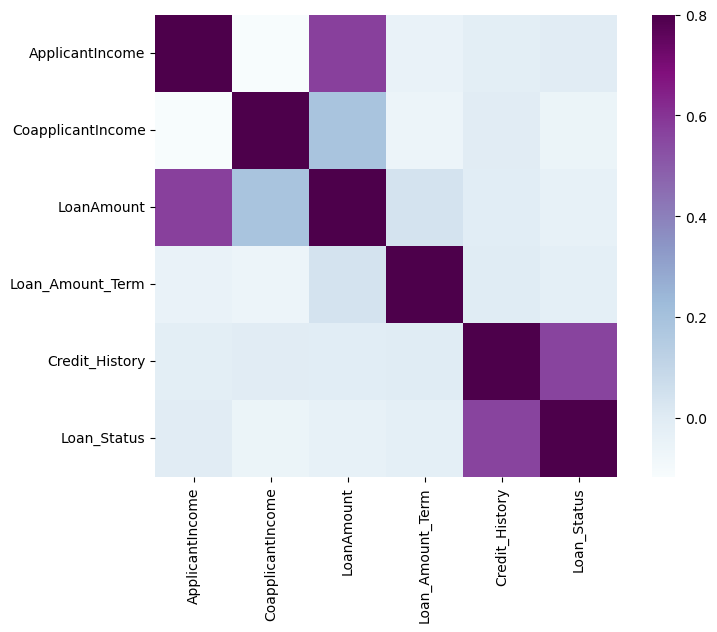

In [205]:
matrix=train.corr() 
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

We can see that the most correlated variables are (Applicant Income- Loan Amount) and ( credit history - loan status). Loan amount is also correlated with coapplicants income.

# Missing value and Outlier Treatment:

In [206]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Credit history, Loan amount term, Loan amount, self employed, dependents,married, gender.

There are very less missing values in gender, married, dependents, credit history, self employed featues so we can fill them with mode of the features.

In [207]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [208]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [209]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [210]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [211]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [212]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

In [213]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [214]:
train['LoanAmount'].max()

700.0

To remove the outliers we use log transformation

In [215]:
train['Loan_Amount_Log']=np.log(train['LoanAmount'])

<Axes: >

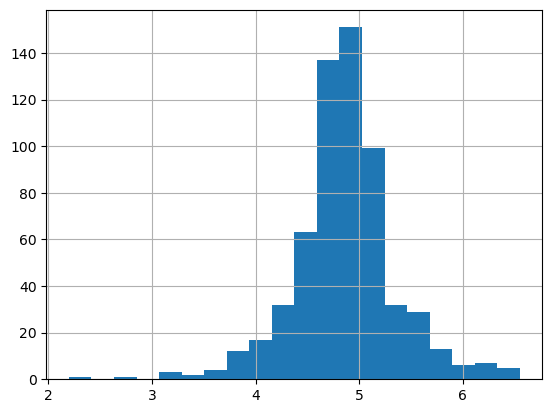

In [216]:
train['Loan_Amount_Log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

In [217]:
test['Loan_Amount_Log']=np.log(test['LoanAmount'])

# Model Building-part 1(Logistic Regression)

In [218]:
train=train.drop('Loan_ID', axis=1)


In [219]:
test=test.drop('Loan_ID',axis=1)

Make dummy variables for the categorical variables. Dummy variables turn categorical variables into values of 0 and 1, making them lot easier to quantify and compare.

In [220]:

train=pd.get_dummies(train)
X = train.drop('Loan_Status', axis = 1)
y=train['Loan_Status']


In [221]:
test=pd.get_dummies(test)


Using the train_test_split function from sklearn to divide our train dataset as train and validation dataset.

In [222]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

Fit the logistic regression model.

In [223]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [224]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True, intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1, penalty='l2',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

### Predicting the loan status for validation set and calculating its accuracy

In [225]:
pred_cv=model.predict(x_cv)

In [226]:
accuracy_score(y_cv,pred_cv)

0.7621621621621621

Our predictions are around 80% accurate. we predicted 80% of the loan status correctly.

### Prediction for the test data set.

In [227]:
pred_test=model.predict(test)

In [228]:
submission=pd.read_csv(r'sample_submission_49d68Cx.csv')

In [229]:
submission['Loan_Status']=pred_test

In [230]:
submission['Loan_ID']=test_original['Loan_ID']

In [231]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [232]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)

# Logistic Regression using strtified k fold cross validation

In [233]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


Let us visualize the ROC curve

In [234]:
from sklearn import metrics

In [235]:
fpr,tpr,_=metrics.roc_curve(yvl,pred)

In [236]:
auc=metrics.roc_auc_score(yvl,pred)

In [237]:
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

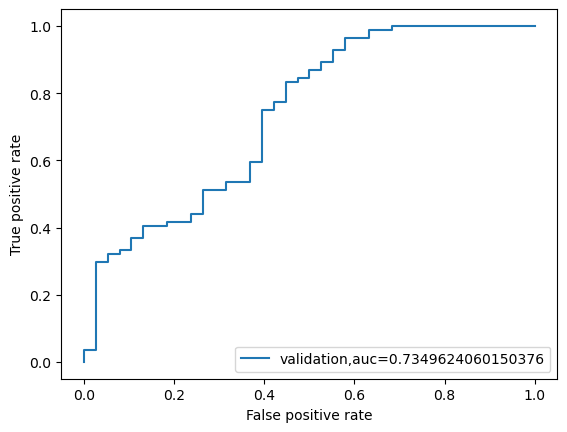

In [238]:
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc=4)
plt.show()

In [239]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [240]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [241]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logisticstra5.csv',index=False)

# Feature Engineering

We will create the following three new features:
1. Total income - If the total income is high the chances for loan approval might also be high.
2. EMI- People who have high emi might find it difficult to repay the loan.
3. Balance Income- This is income left after emi is paid. If this value is high there is high chances for the person to repay the loan which in turn increase the chances of approval.

In [242]:
train['total_income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [243]:
test['total_income']=test['ApplicantIncome']+test['CoapplicantIncome']

<Axes: xlabel='total_income', ylabel='Density'>

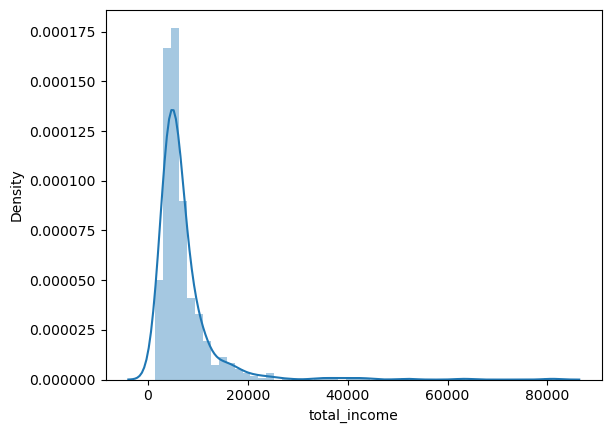

In [244]:
sns.distplot(train['total_income'])

The distribution is right skewed. Taking the log transformation to make the distribution normal.

In [245]:
train['total_income_log']=np.log(train['total_income'])

<Axes: xlabel='total_income_log', ylabel='Density'>

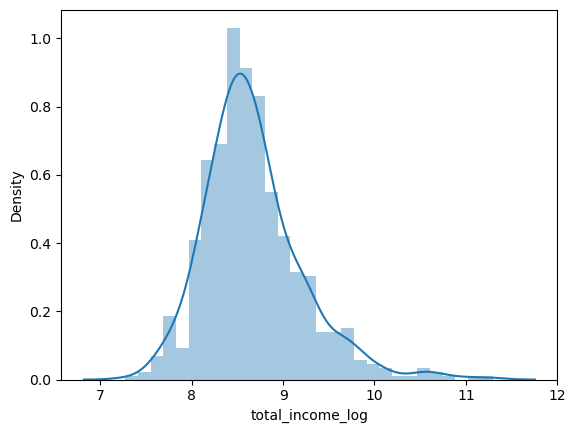

In [246]:
sns.distplot(train['total_income_log'])

In [247]:
test['total_income_log']=np.log(test['total_income'])

In [248]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']

In [249]:
test['EMI']=train['LoanAmount']/test['Loan_Amount_Term']

<Axes: xlabel='EMI', ylabel='Density'>

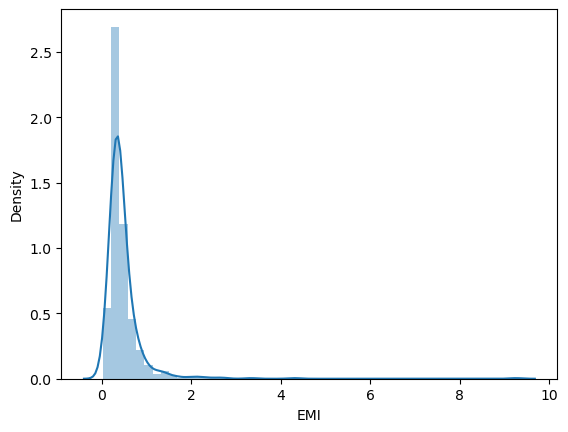

In [250]:
sns.distplot(train['EMI'])

In [251]:
train['Balance_Income']=train['total_income']-(train['EMI']*1000)

In [252]:
test['Balance_Income']=test['total_income']-(test['EMI']*1000)

<Axes: xlabel='Balance_Income', ylabel='Density'>

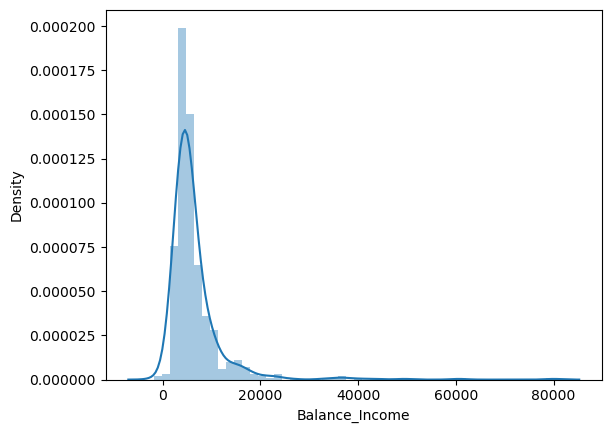

In [253]:
sns.distplot(train['Balance_Income'])

Dropping the variables used to create the new variables. Because the correlation between the old features and the new features will be very high and logistic regression assumes that the variables are not highly correlated. And also to remove the noise from the dataset. 

In [254]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [255]:
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

# Model Building- part 2

Will build the following models:
1. Logistic regression
2. Decision tree
3. Random Forest
4. XGBoost

In [256]:
X=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

In [257]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [258]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [259]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [260]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('log.csv',index=False)

From the submission we got an accuracy of 0.7847. Feature engineering has not improved our model.

In [261]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [262]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [263]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [264]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Decision.csv',index=False)

Accuracy 0.63 which is less than Logistic regression model.

In [265]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


Trying to increase the accuracy by tuning the hyperparameters of the model. Using grid search to get the optimized values of the hyper parameters. Also will tune the max_depth and n_estimators parameters.

In [266]:
param_grid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [267]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),param_grid)

In [268]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [269]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [270]:
GridSearchCV(cv=None,error_score='raise', estimator=RandomForestClassifier(bootstrap=True,class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=10,n_jobs=1,oob_score=False,random_state=1,verbose=0,warm_start=False),n_jobs=1,param_grid={'max_depth':[1,3,5,7,9,11,13,15,17,19],'n_estimators':[1,21,41,61,81,101,121,141,161,181]},pre_dispatch='2*n_jobs',refit=True,return_train_score='warn',scoring=None,verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]},
             return_train_score='warn')

In [271]:
grid_search.best_estimator_
RandomForestClassifier(bootstrap=True, class_weight=None,criterion='gini',max_depth=3,max_features='auto',max_leaf_nodes=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=41,n_jobs=1,oob_score=False,random_state=1,verbose=0,warm_start=False)

RandomForestClassifier(max_depth=3, max_features='auto', n_estimators=41,
                       n_jobs=1, random_state=1)

Optimized value for max_depth =3, n_estimators =41.

In [272]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=10,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8455284552845529

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7704918032786885


In [273]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [274]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [275]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('RandomForest.csv',index=False)

Accuracy =0.7738

### Feature importance:

<Axes: >

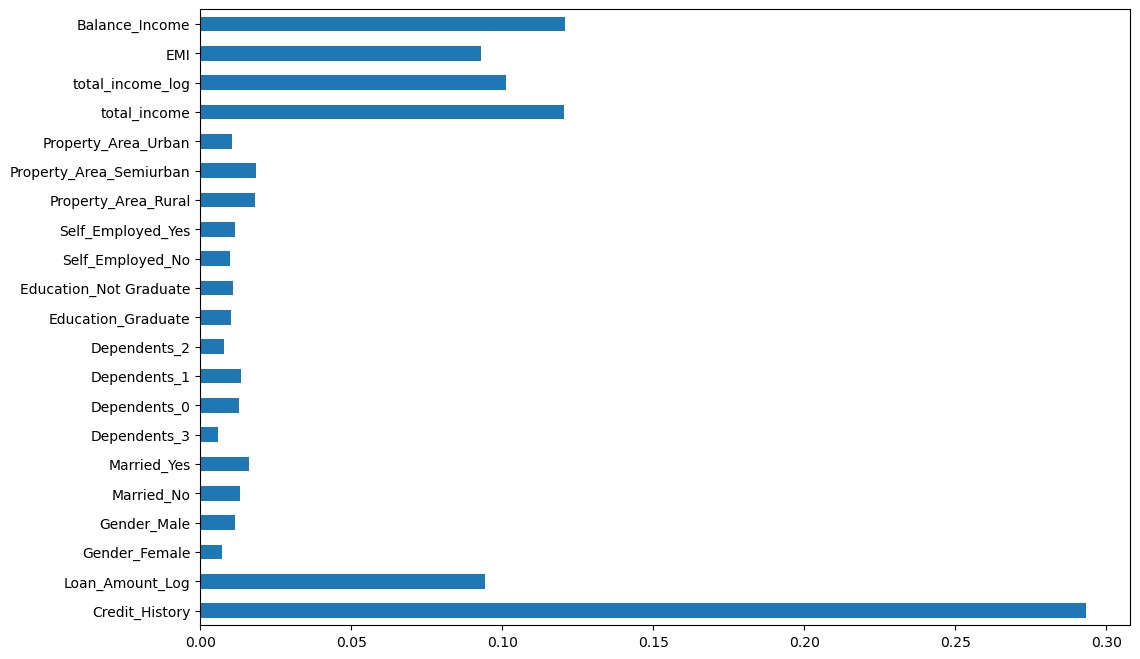

In [276]:
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

We can see that the credit history is the important feature followed by the balance income, EMI. Feature engineering helped us in predicting our target variable.

In [277]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=RandomForestClassifier(max_depth=4,n_estimators=50)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test=model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


In [278]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [279]:
submission['Loan_Status'].replace(0,'N', inplace=True)
submission['Loan_Status'].replace(1,'Y', inplace=True)

In [280]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv',index=False)

Accuracy= 0.7361

After trying and testing 4 different algorithms, the best accuracy on the public leaderboard is achieved by Loistic Regression(0.7847), followed by random forest(0.7638).